In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from PIL import Image, ImageDraw
%matplotlib inline

In [7]:
multiplate_flag=1 #1, 2 y 3 - each multiplate has its own folder
#folder_multiplate="C:\Users\Marko\Desktop\rle\codigo\circles\Final\multiplate_"+str(multiplate_flag)+"\images"
#print(folder_multiplate)
sample_flag=1 # 10 (this variable should be changed) - samples of each multiplate
file="sample_"
number_of_sample=str(sample_flag)
type_image=".jpg"
image=file+number_of_sample+type_image
print(image)

sample_1.jpg


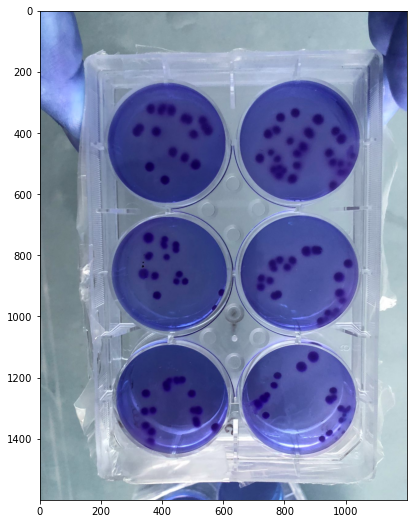

In [8]:
img= cv2.imread(image,1) #original image
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img)
img_detect=img.copy() #circle detected image

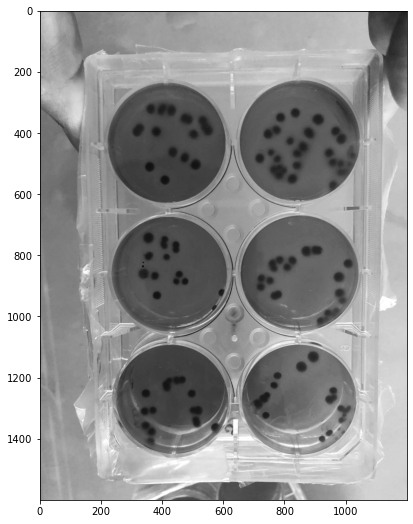

In [9]:
img_gray=cv2.cvtColor(img,	cv2.COLOR_BGR2GRAY) # gray image
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img_gray,cmap='gray')

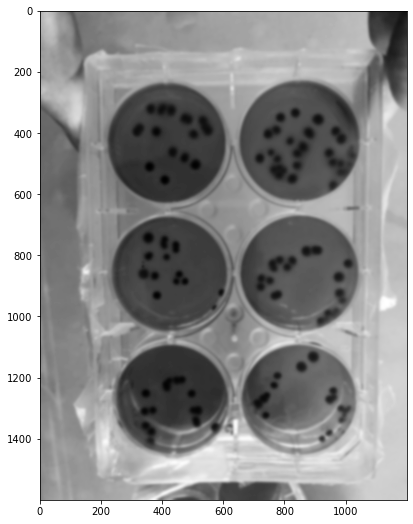

In [10]:
img_blur=cv2.GaussianBlur(img_gray, (21,21), cv2.BORDER_DEFAULT) #blurry and gray image
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img_blur,cmap='gray')

In [11]:
all_circs = cv2.HoughCircles( img_blur,cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 180, maxRadius = 220) #circle detection (180,220) plates
all_circs_rounded=np.uint16(np.around(all_circs)) #all values of the circle detection are rounded

In [12]:
print (all_circs_rounded) #x y radius
print (all_circs_rounded.shape)
print (str(all_circs_rounded.shape[1])) #number of circles detected

[[[ 850  426  196]
  [ 416  432  195]
  [ 848  862  193]
  [ 424  862  186]
  [ 428 1276  184]
  [ 844 1276  184]]]
(1, 6, 3)
6


In [13]:
#Esto se puede obviar, es solo para comprobar los circulos detectados
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_detect, (i[0],i[1]), i[2], (50,200,200), 5) #outline of circle detected
    cv2.circle(img_detect, (i[0], i[1]),2 ,(255,0,0), 3)
    cv2.putText(img_detect, "" + str(count), (i[0]-70, i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (255,0,0), 2)
    count+=1

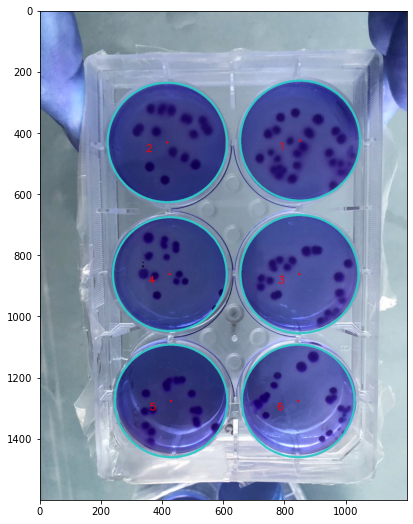

In [14]:
#cv2.imwrite('circle_detected.jpg',img_detect)
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(img_detect)

In [9]:
#cv2.imshow('img_detect',img_detect)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

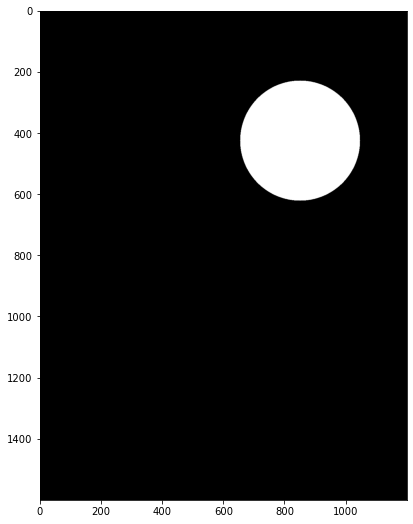

In [15]:
x, y, r = all_circs_rounded[0][0]
#print (x, y, r)
mask= np.zeros_like(img)
mask = cv2.circle(mask, (x,y), r, (255,255,255), -1)
#cv2.imwrite('mask.jpg', mask)
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(mask)

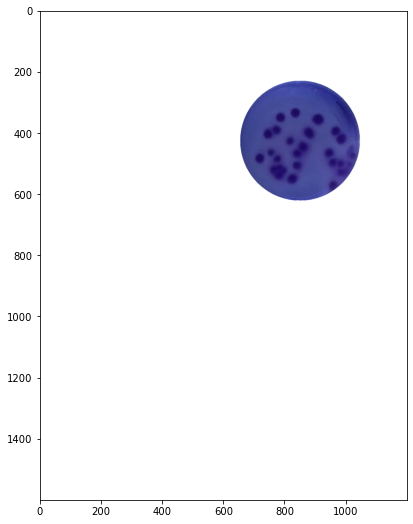

In [16]:
result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask[:,:,0]
#cv2.imwrite('circle_mask.png', result)
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(result)

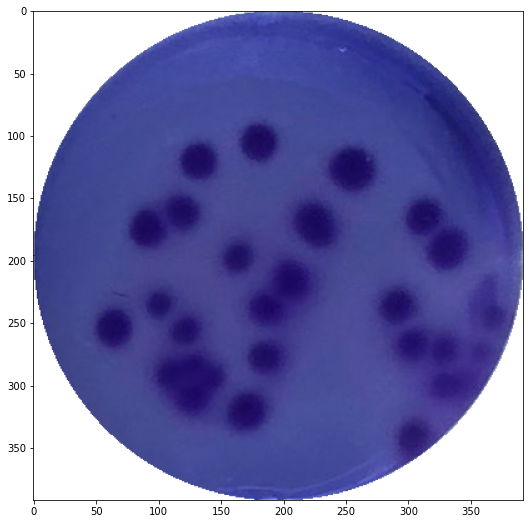

In [17]:
rectX = (x - r) 
rectY = (y - r)
crop_img = result[rectY:(rectY+2*r), rectX:(rectX+2*r)] #crooping 
#cv2.imwrite('crop_img.png',crop_img)
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(crop_img)